In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# RICardo Clustering

## Data Importing & Cleaning

In [2]:
sample = pd.read_csv("RICardo - Network 1905.csv")
sample.head()

,reporting,partner,flow,expimp
0,Philippines,United States of America,3.006962e+06,Exp
1,Philippines,Canada,0.000000e+00,Exp
2,Philippines,United Kingdom,1.708501e+06,Exp
3,Philippines,France,4.783804e+05,Exp
4,Philippines,Germany,6.834005e+04,Exp


In [3]:
#sample.loc[sample.reporting=='Philippines',:]
List_reporting = list(set(sample.reporting))


In [4]:
index_reporting = []
for i in range(sample.shape[0]):
    if sample.partner.values[i] in List_reporting:
        index_reporting += [i]
print (len(index_reporting))

2599


In [5]:
sample_reporting = sample.iloc[index_reporting,:]

In [6]:
List_partner = list(set(sample_reporting.partner))
index = []
for i in range(sample_reporting.shape[0]):
    if sample_reporting.reporting.values[i] in List_partner:
        index += [i]
print (len(index))

2579


In [7]:
sample_sampled = sample_reporting.iloc[index,:]

In [8]:
sample_sampled = sample_sampled.drop_duplicates(keep ='last')

In [9]:
List_sample = List_partner
List_sample

['Canada',
 'Brazil',
 'Russia/USSR',
 'Italy',
 'Guyana (Br. Guiana)',
 'France',
 'French Indochina',
 'Bermuda',
 'Peru',
 'Argentina',
 'Norway',
 'Tanzania (Tanganyika) (German East Africa)',
 'Sarawak',
 'Australia',
 'Algeria',
 'Cuba',
 'El Salvador',
 'Venezuela',
 'British Somaliland (Somaliland Republic)',
 'Egypt/United Arab Republic',
 'United States of America',
 'Gambia',
 'Germany',
 'Chile',
 'Puerto Rico',
 'Belgium',
 'Ghana (Gold Coast)',
 'Indonesia (Dutch East Indies)',
 'Sierra Leone',
 'Spain',
 'South West Africa (German West Africa) (Namibia)',
 'Belize (British Honduras)',
 'Netherlands',
 'Federated Malay States',
 'Malawi (Nyasaland)',
 'Sri Lanka (Ceylon)',
 'Denmark',
 'Philippines',
 "China (People's Republic of China)",
 'Hawaii',
 'Austria-Hungary',
 'Mauritius',
 'Trinidad and Tobago',
 'Sweden',
 'Finland',
 'Southern Nigeria',
 'Switzerland',
 'New Zealand',
 'Thailand (Siam)',
 'Newfoundland',
 'Bulgaria',
 'Jamaica',
 'Romania',
 'Iran (Persia)',


In [10]:
def Exp(A,B,data = sample_sampled):
    if A != B:
        sample = data.loc[(data.reporting == A)&(data.partner == B)&(data.expimp == 'Exp') == 1,:]
        if len(sample.flow.values)!=0:
            return sample.flow.values[0]
        #elif np.shape((Imp(B,A,data = data)))!= 0:
            #return Imp(B,A,data = data)
        else:
            return 0.
    else:
        return 0.

def Imp(A,B,data = sample_sampled):
    if A != B:
        sample = data.loc[(data.reporting == A)&(data.partner == B)&(data.expimp == 'Imp') == 1,:]
        if len(sample.flow.values)!=0:
            return sample.flow.values[0]
        #elif np.shape(Exp(B,A,data = data))[0]!= 0:
            #return Exp(B,A,data = data)
        else:
            return 0.
    else:
        return 0.

In [11]:
#test
Exp(List_sample[2],List_sample[3])
Imp(List_sample[2],List_sample[3])

1001699.0549007115

In [12]:
def BTB(A,B,data = sample_sampled):
    sum = Exp(A,B,data = data) + Imp(A,B,data = data)
    if A==B:
        btb = 0.
    
    elif sum != 0.:
        btb = (Exp(A,B,data = data) - Imp(A,B,data = data))/sum
    else:
        btb = 1.
    
    return btb

In [13]:
def BTB_modified(A,B):
    return np.abs((BTB(A,B)+BTB(B,A))/2.)

In [14]:
#test
print (BTB('Mexico','United States of America'))
print (BTB('United States of America','Mexico'))
print (BTB_modified('Mexico','United States of America'))


-0.111892084756
-0.0180294056205
0.0649607451883


In [15]:
sample_sampled

,reporting,partner,flow,expimp
0,Philippines,United States of America,3.006962e+06,Exp
1,Philippines,Canada,0.000000e+00,Exp
2,Philippines,United Kingdom,1.708501e+06,Exp
3,Philippines,France,4.783804e+05,Exp
4,Philippines,Germany,6.834005e+04,Exp
5,Philippines,Spain,3.417003e+05,Exp
6,Philippines,Belgium,0.000000e+00,Exp
7,Philippines,Switzerland,0.000000e+00,Exp
8,Philippines,Italy,0.000000e+00,Exp
9,Philippines,Netherlands,0.000000e+00,Exp


## Conctruction of Dissymilarity Matrix
We will use the BTB_modified to define the dissymilarity matrix.

In [16]:
N = len(List_sample)
Diss = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        Diss[i][j] = BTB_modified(List_sample[i],List_sample[j])

In [17]:
Imp(List_sample[10],List_sample[2])

0.0

In [18]:
import scipy.spatial.distance as ssd 
distArray = ssd.squareform(Diss) 

In [19]:
import scipy.cluster as clus
link_av = clus.hierarchy.linkage(distArray, method='average' )

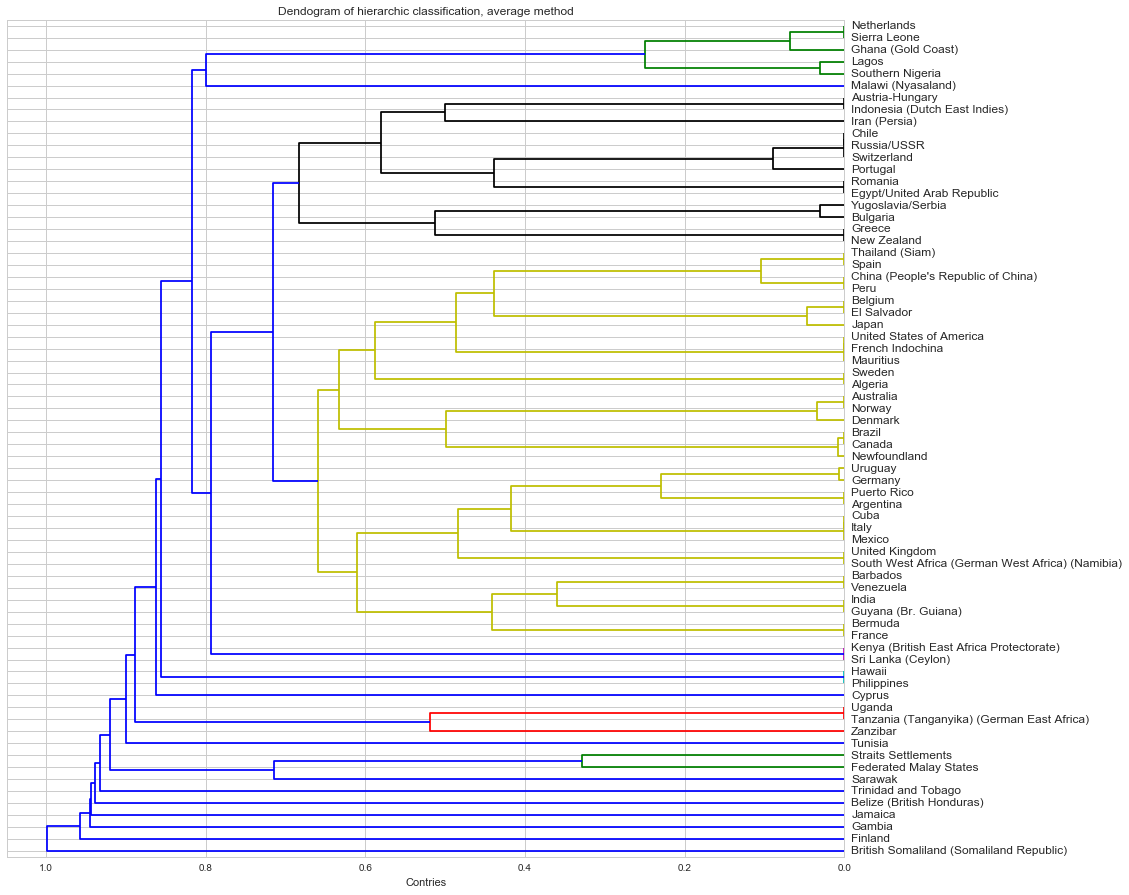

In [28]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 15))
plt.title('Dendogram of hierarchic classification, average method')
plt.xlabel('Contries')
plt.ylabel('')
P = dendrogram(link_av,
    labels = List_sample,
    orientation = "left",
    leaf_font_size=12.) 

In [21]:
import scipy.cluster as clus
link_wt = clus.hierarchy.linkage(distArray, method='weighted' )

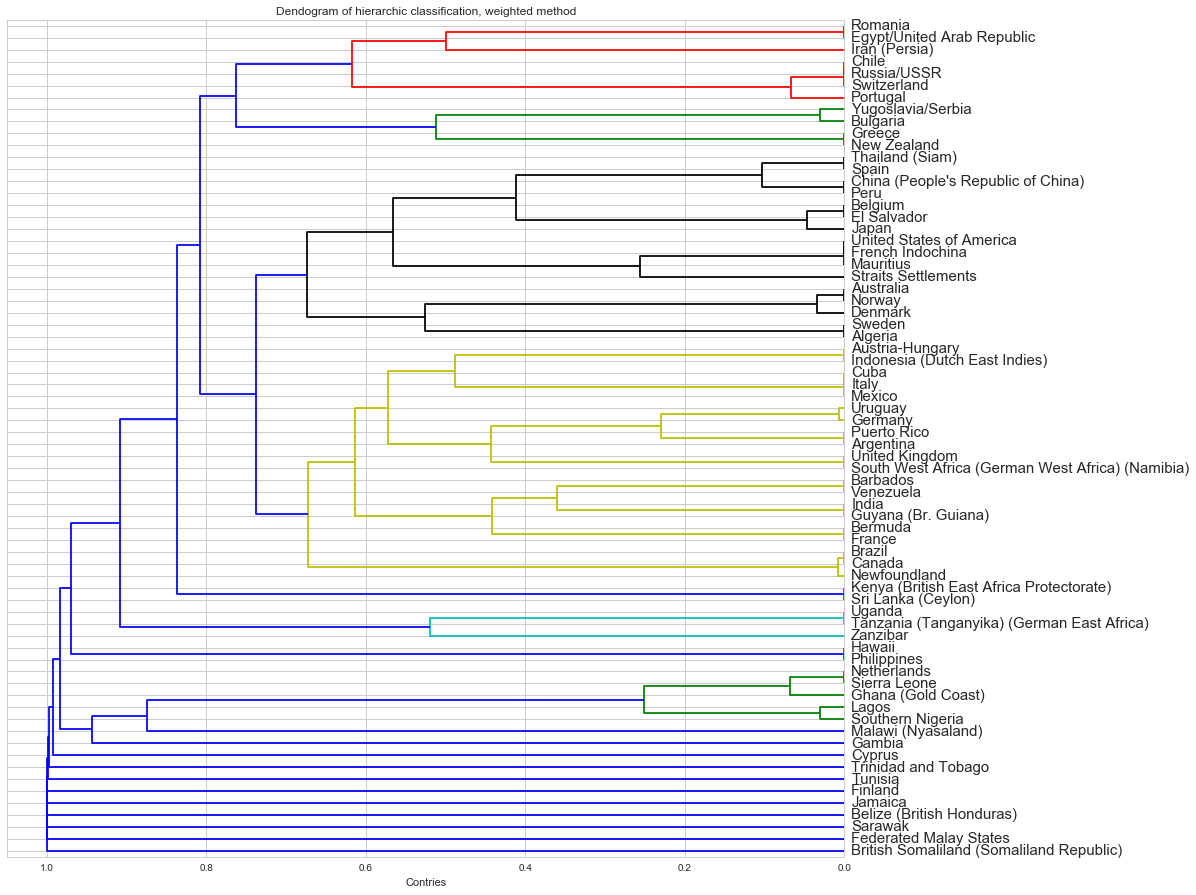

In [26]:
plt.figure(figsize=(15, 15))
plt.title('Dendogram of hierarchic classification, weighted method')
plt.xlabel('Contries')
plt.ylabel('')
P = dendrogram(link_wt,
    labels = List_sample,
    orientation = "left",
    leaf_font_size=15.) 

In [23]:
Diss[0:5,0:5]

array([[ 0.        ,  0.        ,  0.53612943,  0.53478777,  0.15533807],
       [ 0.        ,  0.        ,  0.19589258,  0.26723972,  1.        ],
       [ 0.53612943,  0.19589258,  0.        ,  0.86914423,  1.        ],
       [ 0.53478777,  0.26723972,  0.86914423,  0.        ,  1.        ],
       [ 0.15533807,  1.        ,  1.        ,  1.        ,  0.        ]])